[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/X-ray-Imaging-Group/X-ray-Root-Cellar/blob/main/Poisson_ratio/Poisson_ratio_calculator.ipynb)

<div>
<img src="https://github.com/darwinqii/X-ray-Root-Cellar/blob/main/Poisson_ratio/Resources/legend.png?raw=1" width="450"/>
</div>

In [ ]:
#@title <-- Click this button to run.
import numpy as np
import pandas as pd


def material_compliance(material, s):
    data = {'material': ['Si', 'Ge', 'C'],
            'lattice spacing (m)': [0.00000000054309402, 0.000000000565735, 0.000000000356679],
            's11': [0.768, 0.964, 0.0949],
            's12': [-0.214, -0.26, -0.00978],
            's44': [1.26, 1.49, 0.17]}
    data = pd.DataFrame(data)
    data = data.set_index('material')
    s = data.loc[material, s]
    return s


def normalize_vector(v):
    v_sum = np.sqrt(v[0] ** 2 + v[1] ** 2 + v[2] ** 2)
    return np.array([v[0] / v_sum, v[1] / v_sum, v[2] / v_sum])


def cross_vector(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.cross(v1, v2)


def calculator(material, reflection_hkl, bending_hkl, chi=0):
    """
    References: Wortman, J. J., & Evans, R. A. (1965). Young’s modulus, shear modulus, and poisson’s ratio in silicon
    and germanium. Journal of Applied Physics, 36(1), 153–156. https://doi.org/10.1063/1.1713863

    Parameters
    ----------
    material: 'Si', 'Ge', 'C'
    reflection_hkl: [h, k, l]
    bending_hkl: [h, k, l]
    chi: Degree.  Asymmetric angle from reflection plane to surface normal (counterclockwise positive)

    Returns
    -------
    Poisson's ratio on ZX direction.
    """
    chi = np.radians(chi)
    # XR, YR, ZR for Reflection related dimensions
    ZR = np.array(reflection_hkl)
    Y = np.array(bending_hkl)
    XR = np.cross(Y, ZR)

    # **n for NORMALIZED vector
    XRn = normalize_vector(XR)
    # Yn = normalize_vector(Y)
    ZRn = normalize_vector(ZR)

    # X, Y, Z for crystal orientation related dimensions
    X = XRn * np.cos(chi) - ZRn * np.sin(chi)
    Z = np.cross(X, Y)

    # *n for NORMALIZED vector
    Xn = normalize_vector(X)
    Yn = normalize_vector(Y)
    Zn = normalize_vector(Z)

    # sc** for Compliance coefficient
    sc11 = material_compliance(material, 's11')
    sc12 = material_compliance(material, 's12')
    sc44 = material_compliance(material, 's44')
    sc = sc11 - sc12 - 0.5 * sc44

    s13 = sc12 + sc * (Xn[0] ** 2 * Zn[0] ** 2 + Xn[1] ** 2 * Zn[1] ** 2 + Xn[2] ** 2 * Zn[2] ** 2)
    s33 = sc11 + sc * (Zn[0] ** 4 + Zn[1] ** 4 + Zn[2] ** 4 - 1)
    sp31 = s13 / s33

    c_factor = 1.0
    nu = -sp31 * c_factor  # (\nu ZX)
    return nu


#@markdown Material
material = 'Si' #@param ["Si", "Ge", "C"]

#@markdown Reflection
h_reflection =  1#@param {type:"number"}
k_reflection = 1 #@param {type:"number"}
l_reflection =  -1#@param {type:"number"}

reflection_hkl=[h_reflection, k_reflection, l_reflection]

#@markdown Bending axis (perpendicular to Reflection)
h_bending = 1 #@param {type:"number"}
k_bending =  -1#@param {type:"number"}
l_bending = 0 #@param {type:"number"}

bending_hkl=[h_bending, k_bending, l_bending]

#@markdown Asymmetry angle (degree)
chi =  5#@param {type:"number"}

nu = calculator(material, reflection_hkl, bending_hkl, chi=chi)
print("The Poisson's ratio is \n{:.4f}".format(nu))


The Poisson's ratio is 
0.2123


## Useful tools

In [ ]:
#@title Calculate the Bending axis, if the Surface and Reflection are known. 

import numpy as np

def cross_vector(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.cross(v1, v2)

#@markdown Surface
h_surface = 2 #@param {type:"number"}
k_surface = 2 #@param {type:"number"}
l_surface = 4 #@param {type:"number"}
surface_hkl=[h_surface, k_surface, l_surface]



#@markdown Reflection
h_reflection = 1 #@param {type:"number"}
k_reflection = 1 #@param {type:"number"}
l_reflection = -1 #@param {type:"number"}
reflection_hkl=[h_reflection, k_reflection, l_reflection]

bending = cross_vector(reflection_hkl,surface_hkl)
print("The bending axis is {}".format(bending))

The bending axis is [ 6 -6  0]


## Relation between Poisson's ratio $\nu$ and asymmetry angle $\chi$. 

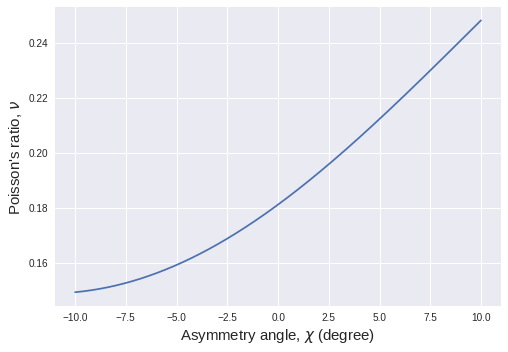

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn') # ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


def material_compliance(material, s):
    data = {'material': ['Si', 'Ge', 'C'],
            'lattice spacing (m)': [0.00000000054309402, 0.000000000565735, 0.000000000356679],
            's11': [0.768, 0.964, 0.0949],
            's12': [-0.214, -0.26, -0.00978],
            's44': [1.26, 1.49, 0.17]}
    data = pd.DataFrame(data)
    data = data.set_index('material')
    s = data.loc[material, s]
    return s


def normalize_vector(v):
    v_sum = np.sqrt(v[0] ** 2 + v[1] ** 2 + v[2] ** 2)
    return np.array([v[0] / v_sum, v[1] / v_sum, v[2] / v_sum])


def cross_vector(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.cross(v1, v2)


def calculator(material, reflection_hkl, bending_hkl, chi=0):
    """
    References: Wortman, J. J., & Evans, R. A. (1965). Young’s modulus, shear modulus, and poisson’s ratio in silicon
    and germanium. Journal of Applied Physics, 36(1), 153–156. https://doi.org/10.1063/1.1713863

    Parameters
    ----------
    material: 'Si', 'Ge', 'C'
    reflection_hkl: [h, k, l]
    bending_hkl: [h, k, l]
    chi: Degree.  Asymmetric angle from reflection plane to surface normal (counterclockwise positive)

    Returns
    -------
    Poisson's ratio on ZX direction.
    """
    chi = np.radians(chi)
    # XR, YR, ZR for Reflection related dimensions
    ZR = np.array(reflection_hkl)
    Y = np.array(bending_hkl)
    XR = np.cross(Y, ZR)

    # **n for NORMALIZED vector
    XRn = normalize_vector(XR)
    # Yn = normalize_vector(Y)
    ZRn = normalize_vector(ZR)

    # X, Y, Z for crystal orientation related dimensions
    X = XRn * np.cos(chi) - ZRn * np.sin(chi)
    Z = np.cross(X, Y)

    # *n for NORMALIZED vector
    Xn = normalize_vector(X)
    Yn = normalize_vector(Y)
    Zn = normalize_vector(Z)

    # sc** for Compliance coefficient
    sc11 = material_compliance(material, 's11')
    sc12 = material_compliance(material, 's12')
    sc44 = material_compliance(material, 's44')
    sc = sc11 - sc12 - 0.5 * sc44

    s13 = sc12 + sc * (Xn[0] ** 2 * Zn[0] ** 2 + Xn[1] ** 2 * Zn[1] ** 2 + Xn[2] ** 2 * Zn[2] ** 2)
    s33 = sc11 + sc * (Zn[0] ** 4 + Zn[1] ** 4 + Zn[2] ** 4 - 1)
    sp31 = s13 / s33

    c_factor = 1.0
    nu = -sp31 * c_factor  # (\nu ZX)
    return nu


#@markdown Material
material = 'Si' #@param ["Si", "Ge", "C"]

#@markdown Reflection
h_reflection =  1#@param {type:"number"}
k_reflection = 1 #@param {type:"number"}
l_reflection =  -1#@param {type:"number"}

reflection_hkl=[h_reflection, k_reflection, l_reflection]

#@markdown Bending axis (perpendicular to Reflection)
h_bending = 1 #@param {type:"number"}
k_bending =  -1#@param {type:"number"}
l_bending = 0 #@param {type:"number"}

bending_hkl=[h_bending, k_bending, l_bending]

#@markdown Asymmetry angle range
chi_1 = -10 #@param {type:"number"}
chi_2 = 10 #@param {type:"number"}
interval = 0.01 #@param {type:"number"}
chis=  np.arange(chi_1, chi_2, interval) 

nus = np.array([calculator(material, reflection_hkl, bending_hkl, chi=chi) for chi in chis])

plt.plot(chis, nus)
fs=15
plt.xlabel('Asymmetry angle, $\chi$ (degree)', fontsize=fs)
plt.ylabel(r"Poisson's ratio, $\nu$ ", fontsize=fs);



